# Bird Species Prediction by Shoaib Hoque

In [1]:
# Library Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

visualize some of the bird images that we will be working on

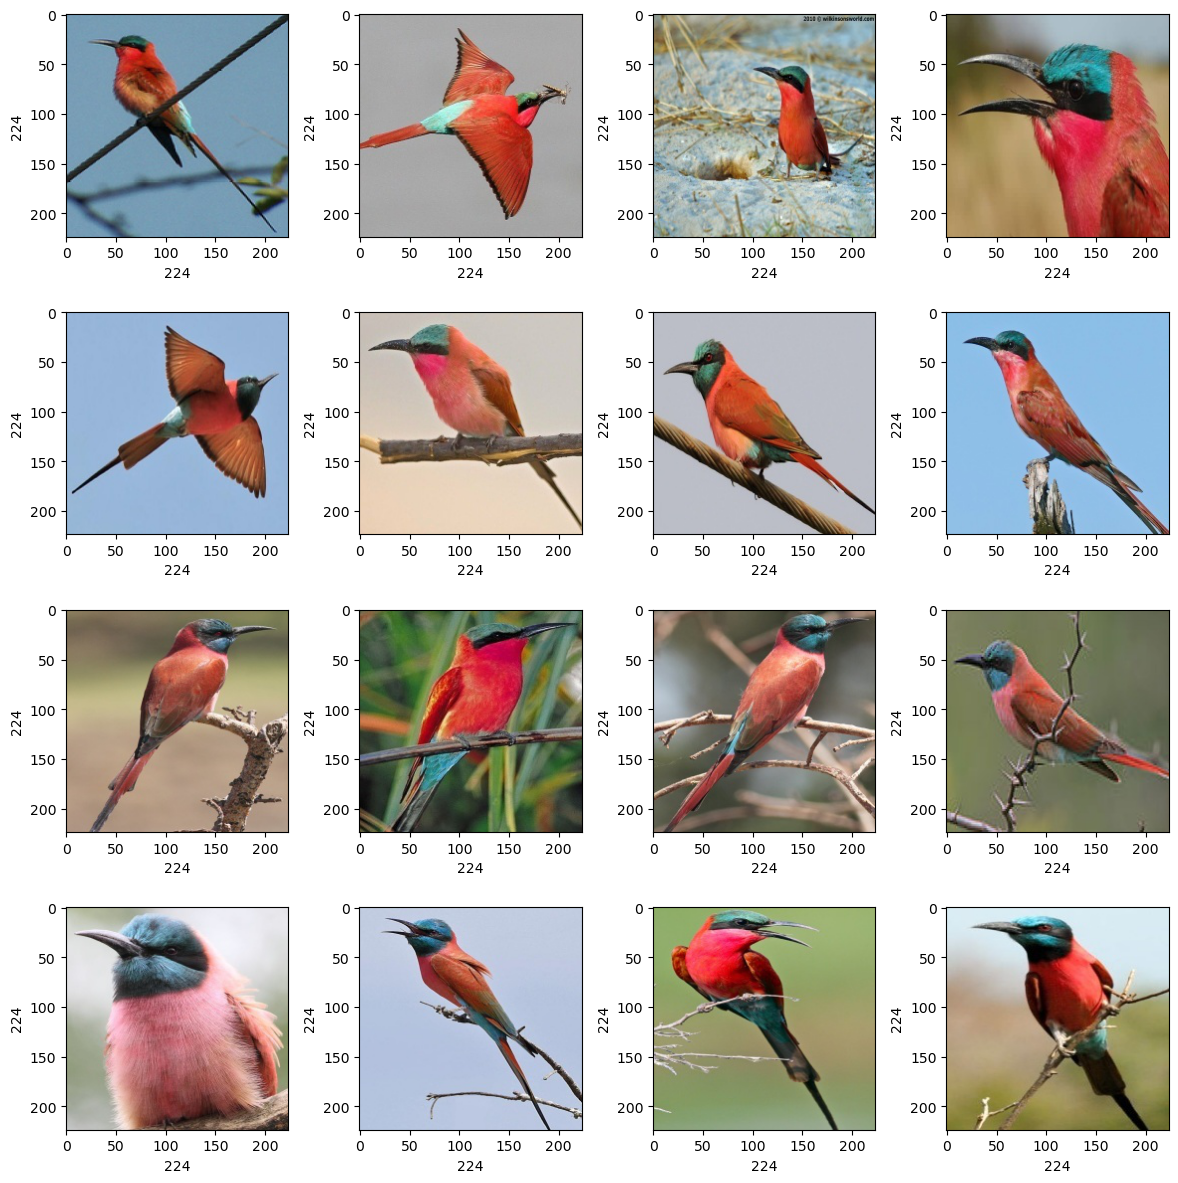

In [2]:
plt.figure(figsize=(12,12))
path = "Bird Speciees Dataset/CARMINE BEE-EATER"

for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

setting the root directory for the dataset and storing all the folders name of the dataset. we will also create 2 empty list for image and labels

In [3]:
dir = "Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

we will read all the images and covert it into array and appending the list created above with the image and its label

In [4]:
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
        image = cv2.imread(image_path)
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

check for class imbalance

In [5]:
# visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
Name: count, dtype: int64

find the number of classes

In [6]:
num_classes = len(label_counts)
num_classes

6

checking the size and shape of the image

In [7]:
image_list[0].shape

(224, 224, 3)

In [8]:
label_list = np.array(label_list)
label_list.shape

(811,)

splitting the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=42)

Normalize and reshape the data

In [10]:
X_train = np.array(X_train, dtype=np.float16) / 225.0
X_test = np.array(X_test, dtype=np.float16) / 225.0
X_train = X_train.reshape(-1, 224,224,3)
X_test = X_test.reshape(-1, 224,224,3)

use label binarizer to one hot encode our y data

In [11]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [12]:
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

Building the model Architecture

In [13]:
model = Sequential()
model.add(Conv2D(16, (3,3), padding="same", input_shape= (224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))

model.summary()


g:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 74, 74, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2592)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        82,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,222 (489.15 KB)

 Trainable params: 125,222 (489.15 KB)

 Non-trainable params: 0 (0.00 B)

Compiling Model

In [14]:
model.compile(loss= "categorical_crossentropy", optimizer= Adam(0.0005), metrics=['accuracy'])

In [15]:
print(x_train.dtype, y_train.dtype, x_val.dtype, y_val.dtype)


float16 int32 float16 int32


Train the Model

In [16]:
epochs = 60
batch_size = 32
history = model.fit(x_train, y_train, batch_size = batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/60
17/17 ━━━━━━━━━━━━━━━━━━━━ 40s 845ms/step - accuracy: 0.1612 - loss: 1.8854 - val_accuracy: 0.1846 - val_loss: 1.7926
Epoch 2/60
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 418ms/step - accuracy: 0.2097 - loss: 1.7909 - val_accuracy: 0.1615 - val_loss: 1.7912
Epoch 3/60
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step - accuracy: 0.1749 - loss: 1.7734 - val_accuracy: 0.1615 - val_loss: 1.7774
Epoch 4/60
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 339ms/step - accuracy: 0.2180 - loss: 1.7373 - val_accuracy: 0.3077 - val_loss: 1.7572
Epoch 5/60
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.2338 - loss: 1.6934 - val_accuracy: 0.3846 - val_loss: 1.6978
Epoch 6/60
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - accuracy: 0.3666 - loss: 1.5994 - val_accuracy: 0.3923 - val_loss: 1.6184
Epoch 7/60
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step - accuracy: 0.4240 - loss: 1.4629 - val_accuracy: 0.4154 - val_loss: 1.6130
Epoch 8/60
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 507ms/step - accuracy: 0.4682 - loss: 1.3940 - val_accuracy: 

In [17]:
model.save("bird_species_model.keras")

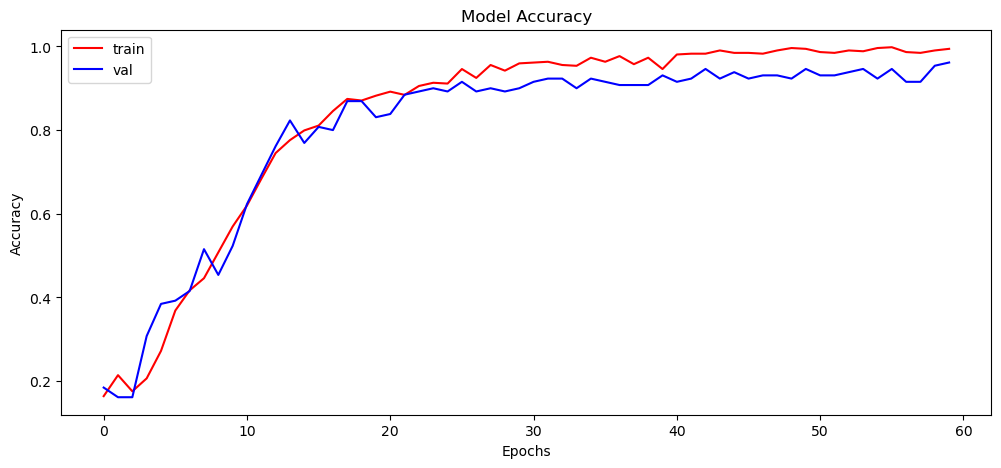

In [18]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

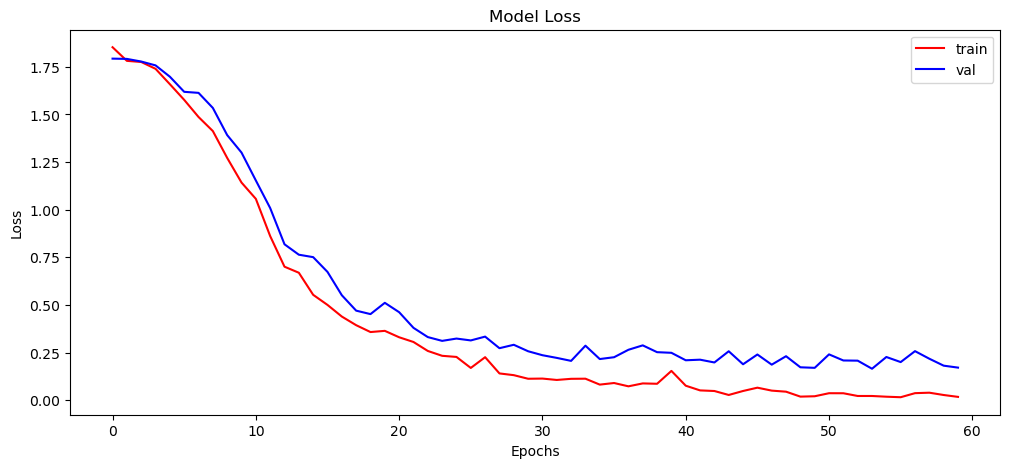

In [19]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()